   @Author: v sanjay kumar<br>
   @Date: 2024-10-05 10:00:30<br>
   @Last Modified by: v sanjay kumar<br>
   @Last Modified time: 2024-10-05 11:00:30<br>
   @Title :Logistic regression problems<br>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc

                                                Logistic Regression

1. The data given in the url is related with direct marketing campaigns of a banking
institution. The marketing campaigns were based on phone calls. Often, more
than one contact to the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
predict whether client will subscribe to term deposit

In [2]:
df=pd.read_csv('data',sep=';',index_col=0)
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.replace('""', '', regex=False)
df = df.map(lambda x: x.replace('"', '') if isinstance(x, str) else x)
df

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [122]:
print(df.info())
print(df['y"'].value_counts())
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   balance    4521 non-null   int64 
 5   housing    4521 non-null   object
 6   loan       4521 non-null   object
 7   contact    4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y"         4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.3+ KB
None
y"
no     4000
yes     521
Name: count, dtype: int64


(4521, 16)

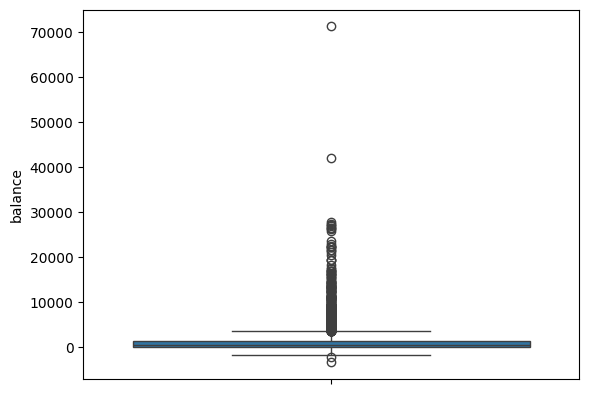

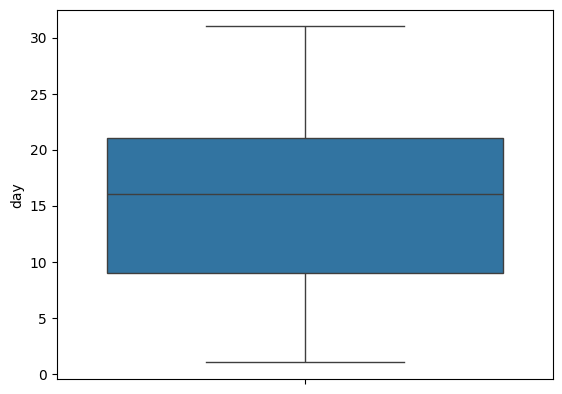

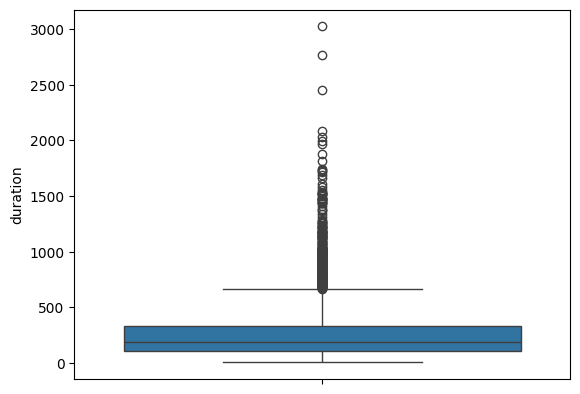

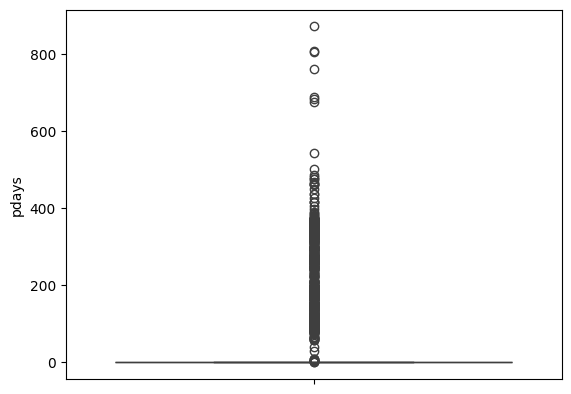

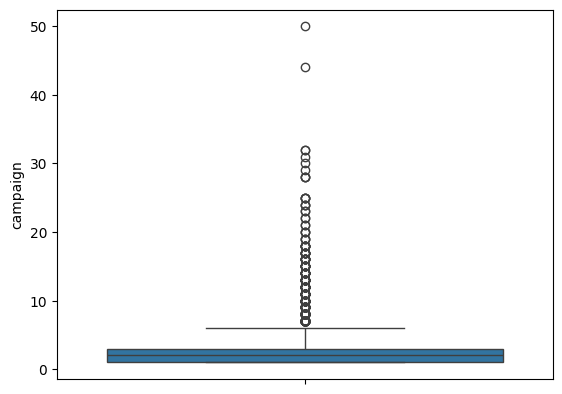

In [123]:
for column in [df.balance, df.day,df.duration,df.pdays,df.campaign]:
    sns.boxplot(data=column)
    plt.show()

In [124]:
columns_to_check = ['balance','duration', 'pdays', 'campaign']

for column in columns_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to remove outliers for the current column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [125]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numeric_features = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [126]:
X = df.drop(columns=['y"'])
y = df['y"'].apply(lambda x: 1 if x == 'yes' else 0)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

3473    0
2519    0
4016    0
1659    0
3824    0
       ..
2623    0
1770    0
1825    0
2100    0
1394    0
Name: y", Length: 2252, dtype: int64

In [128]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [129]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['balance', 'day', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier', LogisticRegression())])

In [130]:
y_pred = pipeline.predict(X_test)

In [131]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       539
           1       0.50      0.12      0.19        25

    accuracy                           0.96       564
   macro avg       0.73      0.56      0.59       564
weighted avg       0.94      0.96      0.94       564



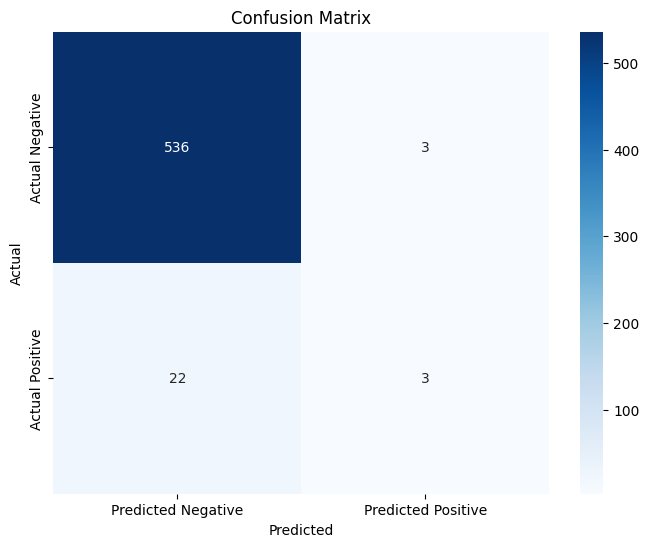

In [132]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

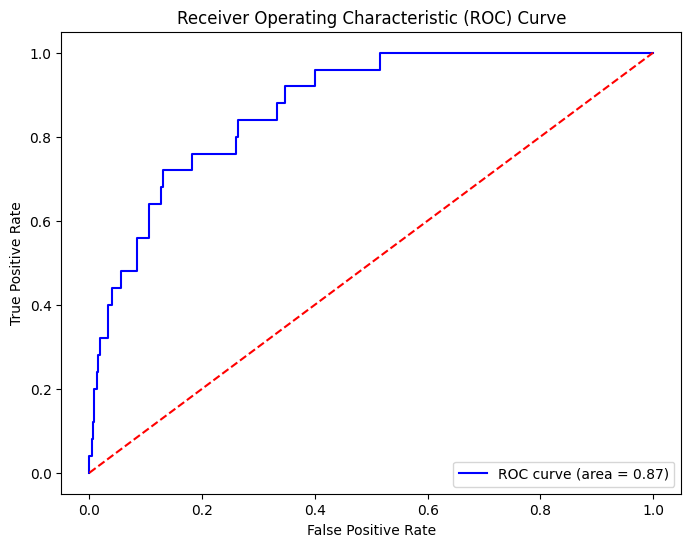

In [133]:
y_probs = pipeline.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()